# 1. Introduction

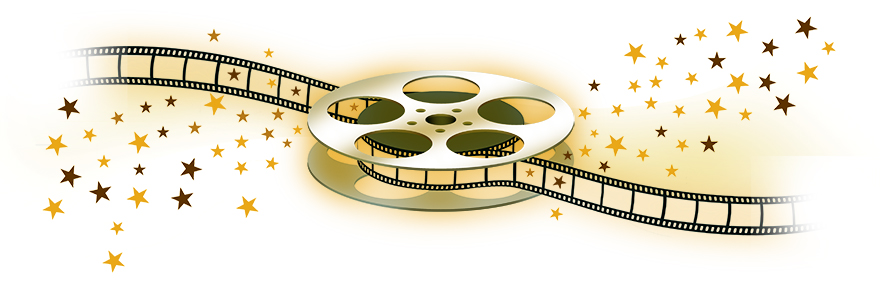

**The project workflow is listed below:**


    The project workflow is listed below:


        1. Introduction
        2. Comet
        3. Install Packages
        4. Importing Dataset
        5. Data Preprocessing and Data Cleaning
        6. Exploratory Data Analysis
        7. Model Selection
        8. Model Evaluation 
        9. Submission
        10. Conclusion

# 2. Installing Packages

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from surprise import Reader, Dataset
from surprise import SVD, NormalPredictor, BaselineOnly, NMF, SlopeOne, CoClustering
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.feature_extraction.text import CountVectorizer
from surprise.model_selection import train_test_split

# 4.Importing dataset

In [2]:
# Load the train and test datasets
df_sample_submission = pd.read_csv('sample_submission.csv')
df_movies = pd.read_csv('movies.csv')
df_imdb= pd.read_csv('imdb_data.csv')
df_genome_scores = pd.read_csv('genome_scores.csv')
df_genome_tags= pd.read_csv('genome_tags.csv')
df_train = pd.read_csv('train.csv')
df_test= pd.read_csv('test.csv')
df_tags = pd.read_csv('tags.csv')
df_links = pd.read_csv('links.csv')

In [3]:
df_sample_submission.head()

,Id,rating
0,1_2011,1.0
1,1_4144,1.0
2,1_5767,1.0
3,1_6711,1.0
4,1_7318,1.0


In [4]:
df_movies[df_movies['genres']=='Film-Noir']

,movieId,title,genres
730,746,Force of Evil (1948),Film-Noir
1125,1153,Raw Deal (1948),Film-Noir
1126,1154,T-Men (1947),Film-Noir
1977,2066,Out of the Past (1947),Film-Noir
3199,3292,"Big Combo, The (1955)",Film-Noir
3285,3380,Railroaded! (1947),Film-Noir
4321,4426,Kiss Me Deadly (1955),Film-Noir
5063,5169,Scarlet Street (1945),Film-Noir
5683,5795,"Big Knife, The (1955)",Film-Noir
7210,7335,Pickup on South Street (1953),Film-Noir


In [5]:
df_imdb.head()

,movieId,title_cast,director,runtime,budget,plot_keywords
0,1,Tom Hanks|Tim Allen|Don Rickles|Jim Varney|Wal...,John Lasseter,81.0,"$30,000,000",toy|rivalry|cowboy|cgi animation
1,2,Robin Williams|Jonathan Hyde|Kirsten Dunst|Bra...,Jonathan Hensleigh,104.0,"$65,000,000",board game|adventurer|fight|game
2,3,Walter Matthau|Jack Lemmon|Sophia Loren|Ann-Ma...,Mark Steven Johnson,101.0,"$25,000,000",boat|lake|neighbor|rivalry
3,4,Whitney Houston|Angela Bassett|Loretta Devine|...,Terry McMillan,124.0,"$16,000,000",black american|husband wife relationship|betra...
4,5,Steve Martin|Diane Keaton|Martin Short|Kimberl...,Albert Hackett,106.0,"$30,000,000",fatherhood|doberman|dog|mansion


In [6]:
df_genome_scores.head()

,movieId,tagId,relevance
0,1,1,0.02875
1,1,2,0.02375
2,1,3,0.06250
3,1,4,0.07575
4,1,5,0.14075


In [7]:
df_genome_tags.head()

,tagId,tag
0,1,007
1,2,007 (series)
2,3,18th century
3,4,1920s
4,5,1930s


In [8]:
df_train.head()

,userId,movieId,rating,timestamp
0,5163,57669,4.0,1518349992
1,106343,5,4.5,1206238739
2,146790,5459,5.0,1076215539
3,106362,32296,2.0,1423042565
4,9041,366,3.0,833375837


In [9]:
df_test.head()

,userId,movieId
0,1,2011
1,1,4144
2,1,5767
3,1,6711
4,1,7318


In [10]:
df_tags.head(1)

,userId,movieId,tag,timestamp
0,3,260,classic,1439472355


In [11]:
df_links.head()

,movieId,imdbId,tmdbId
0,1,114709,862.0
1,2,113497,8844.0
2,3,113228,15602.0
3,4,114885,31357.0
4,5,113041,11862.0


In [12]:
merged_movies = pd.merge(df_movies, df_imdb, on='movieId', how='left')


merged_movies = merged_movies[~merged_movies.title_cast.isnull()].reset_index(drop=True)
merged_movies

,movieId,title,genres,title_cast,director,runtime,budget,plot_keywords
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,Tom Hanks|Tim Allen|Don Rickles|Jim Varney|Wal...,John Lasseter,81.0,"$30,000,000",toy|rivalry|cowboy|cgi animation
1,2,Jumanji (1995),Adventure|Children|Fantasy,Robin Williams|Jonathan Hyde|Kirsten Dunst|Bra...,Jonathan Hensleigh,104.0,"$65,000,000",board game|adventurer|fight|game
2,3,Grumpier Old Men (1995),Comedy|Romance,Walter Matthau|Jack Lemmon|Sophia Loren|Ann-Ma...,Mark Steven Johnson,101.0,"$25,000,000",boat|lake|neighbor|rivalry
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,Whitney Houston|Angela Bassett|Loretta Devine|...,Terry McMillan,124.0,"$16,000,000",black american|husband wife relationship|betra...
4,5,Father of the Bride Part II (1995),Comedy,Steve Martin|Diane Keaton|Martin Short|Kimberl...,Albert Hackett,106.0,"$30,000,000",fatherhood|doberman|dog|mansion
...,...,...,...,...,...,...,...,...
15196,131254,Kein Bund für's Leben (2007),Comedy,Franz Dinda|Florian Lukas|Axel Stein|Kailas Ma...,Carsten Funke,85.0,NaN,man wrapped in a towel|man wears a thong|male ...
15197,131256,"Feuer, Eis & Dosenbier (2002)",Comedy,Rick Kavanian|Axel Stein|Eva Habermann|Christo...,Matthias Dinter,83.0,"DEM5,800,000",ski|ski resort|ampersand in title|drink in title
15198,131258,The Pirates (2014),Adventure,Nam-gil Kim|Ye-jin Son|Hae-Jin Yoo|Kyeong-yeon...,Seong-il Cheon,130.0,NaN,pirate|sword fight|korea|bandit
15199,131260,Rentun Ruusu (2001),(no genres listed),Martti Suosalo|Ilkka Koivula|Vexi Salmi|Riitta...,Timo Koivusalo,102.0,NaN,friend|friendship|television show|restaurant


# EDA

<AxesSubplot:xlabel='UserId', ylabel='Number of Ratings'>

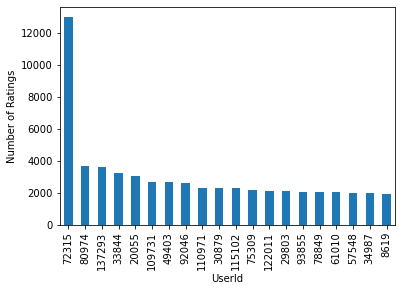

In [23]:
df_train['userId'].value_counts()[:20].plot(xlabel='UserId', ylabel='Number of Ratings', kind='bar')

In [25]:
df_merged = pd.merge(df_train, df_movies, on='movieId')
df_merged['title'].value_counts()[:20].plot(kind='bar')

,userId,movieId,rating,timestamp,title,genres
0,5163,57669,4.0,1518349992,In Bruges (2008),Comedy|Crime|Drama|Thriller
1,87388,57669,3.5,1237455297,In Bruges (2008),Comedy|Crime|Drama|Thriller
2,137050,57669,4.0,1425631854,In Bruges (2008),Comedy|Crime|Drama|Thriller
3,120490,57669,4.5,1408228517,In Bruges (2008),Comedy|Crime|Drama|Thriller
4,50616,57669,4.5,1446941640,In Bruges (2008),Comedy|Crime|Drama|Thriller


<AxesSubplot:xlabel='Movie', ylabel='Number of Ratings'>

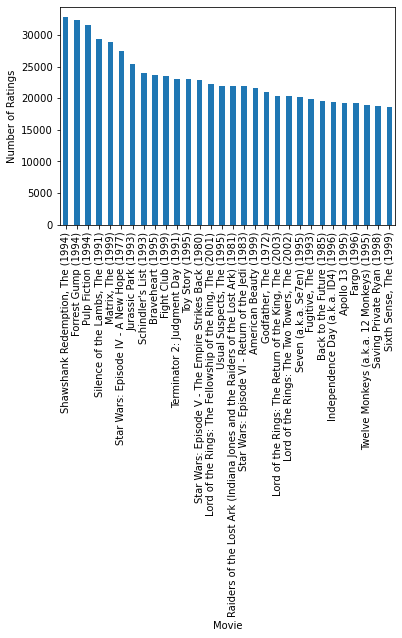

In [84]:
df_merged['title'].value_counts()[:30].plot(xlabel='Movie', ylabel='Number of Ratings', kind='bar')

<AxesSubplot:xlabel='Release Year', ylabel='Number of Ratings'>

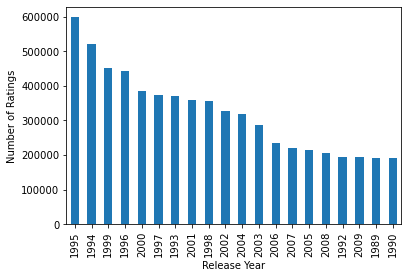

In [93]:
df_merged['title'].str[-5:-1].value_counts()[:20].plot(xlabel='Release Year', ylabel='Number of Ratings', kind='bar')

In [86]:
df_merged['title'].str[-5:-1].value_counts()[:10]

1995    598371
1994    521621
1999    450380
1996    444231
2000    386359
1997    372859
1993    371445
2001    360390
1998    357097
2002    327003
Name: title, dtype: int64

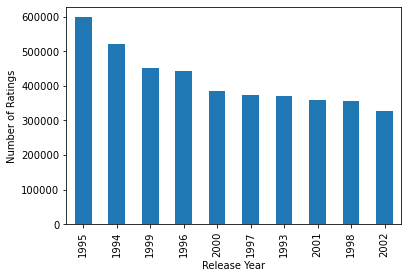

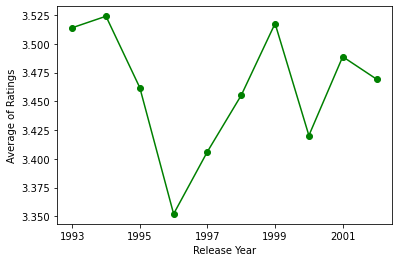

In [150]:
df_merged['year'] = df_merged['title'].str[-5:-1]
df_merged['title'].str[-5:-1].value_counts()[:10].plot(xlabel='Release Year', ylabel='Number of Ratings', kind='bar')
plt.show()

df_common_years = df_merged[df_merged['year'].isin(['1995', '1994', '1999', '1996', '2000', '1997', '1993', '2001', '1998', '2002'])]
df_common_years['rating'].groupby(df_common_years['year']).mean()[:10].plot(xlabel='Release Year', ylabel='Average of Ratings', 
                                                                            linestyle='-', marker='o', color='g')
plt.show()

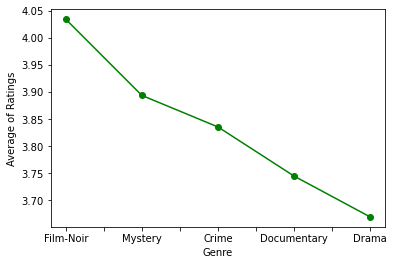

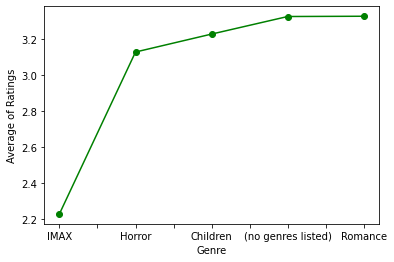

In [152]:
df_merged['genre'] = df_merged['genres'].apply(lambda s:s.split('|')[0])
df_merged['rating'].groupby(df_merged['genre']).mean().sort_values(ascending=False)[:5].plot(xlabel='Genre', ylabel='Average of Ratings', 
                                                                            linestyle='-', marker='o', color='g')
plt.show()

df_merged['rating'].groupby(df_merged['genre']).mean().sort_values(ascending=True)[:5].plot(xlabel='Genre', ylabel='Average of Ratings', 
                                                                            linestyle='-', marker='o', color='g')
plt.show()

In [187]:
budget_graph = merged_movies[merged_movies['budget'].notna()]
budget_graph = budget_graph.replace(',','', regex=True)
budget_graph['budget3']=budget_graph.budget.str.extract('(\d+)')
budget_graph['genre'] = budget_graph['genres'].apply(lambda s:s.split('|')[0])
budget_graph.head()

,movieId,title,genres,title_cast,director,runtime,budget,plot_keywords,budget1,budget2,budget3,genre
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,Tom Hanks|Tim Allen|Don Rickles|Jim Varney|Wal...,John Lasseter,81.0,$30000000,toy|rivalry|cowboy|cgi animation,<pandas.core.strings.accessor.StringMethods ob...,"[, 65,000,000]",30000000,Adventure
1,2,Jumanji (1995),Adventure|Children|Fantasy,Robin Williams|Jonathan Hyde|Kirsten Dunst|Bra...,Jonathan Hensleigh,104.0,$65000000,board game|adventurer|fight|game,<pandas.core.strings.accessor.StringMethods ob...,"[, 65,000,000]",65000000,Adventure
2,3,Grumpier Old Men (1995),Comedy|Romance,Walter Matthau|Jack Lemmon|Sophia Loren|Ann-Ma...,Mark Steven Johnson,101.0,$25000000,boat|lake|neighbor|rivalry,<pandas.core.strings.accessor.StringMethods ob...,"[, 65,000,000]",25000000,Comedy
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,Whitney Houston|Angela Bassett|Loretta Devine|...,Terry McMillan,124.0,$16000000,black american|husband wife relationship|betra...,<pandas.core.strings.accessor.StringMethods ob...,"[, 65,000,000]",16000000,Comedy
4,5,Father of the Bride Part II (1995),Comedy,Steve Martin|Diane Keaton|Martin Short|Kimberl...,Albert Hackett,106.0,$30000000,fatherhood|doberman|dog|mansion,<pandas.core.strings.accessor.StringMethods ob...,"[, 65,000,000]",30000000,Comedy


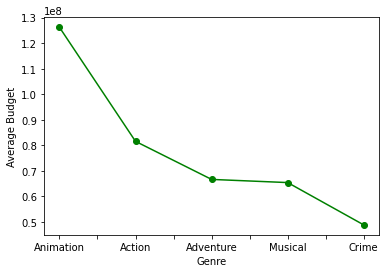

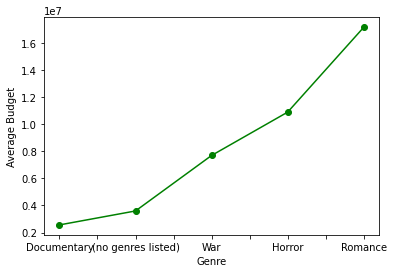

In [190]:

budget_graph['budget3'].astype(float).groupby(budget_graph['genre']).mean().sort_values(ascending=False)[:5].plot(xlabel='Genre', ylabel='Average Budget', 
                                                                            linestyle='-', marker='o', color='g')
plt.show()
budget_graph['budget3'].astype(float).groupby(budget_graph['genre']).mean().sort_values(ascending=True)[:5].plot(xlabel='Genre', ylabel='Average Budget', 
                                                                            linestyle='-', marker='o', color='g')
plt.show()